## Cargar los datos

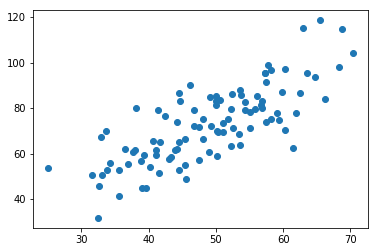

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

points = np.genfromtxt("data/linear-reg.csv", delimiter=",")
x = points[:,0]
y = points[:,1]

plt.scatter(x, y)
plt.show()

## Linear regression

Performing gradient descent...


<IPython.core.display.Javascript object>


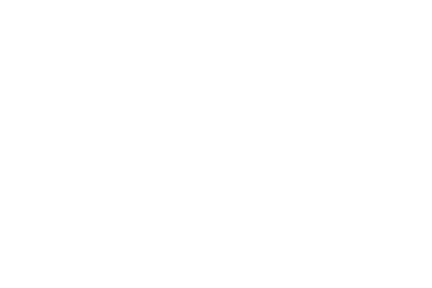


After  1000  iterations:
Slope (m)     =  1.4777440851894448
Intercept (n) =  0.08893651993741346
Square error  =  112.61481011613473


"\n# Plot 1 (data)\nregressionLine = [m*X + n for X in x]\n\ndata = plt.subplot(121)\ndata.axis('equal')\ndata.scatter(x,y, color='cyan')\ndata.plot(x, regressionLine)\ndata.set_title('Data')\n\n# Plot 2 (gradient descent)\nm = np.arange(0,3,0.1)\nn = np.arange(-10,10,1)\nM, N = np.meshgrid(m, n)\nerror = np.array([computeError(x,y) for x,y in zip(np.ravel(M), np.ravel(N))])\nZ = error.reshape(M.shape)\n\ngrad = plt.subplot(122, projection='3d')\ngrad.plot_surface(M, N, Z, cmap='Blues_r') # Plane\ngrad.plot(m_list, n_list, error_list) # Line\ngrad.set_title('Gradient Descent')\ngrad.set_xlabel('slope (m)')\ngrad.set_ylabel('y-intercept (n)')\ngrad.set_zlabel('Error')\n\n\nplt.show()\n"

<IPython.core.display.Javascript object>


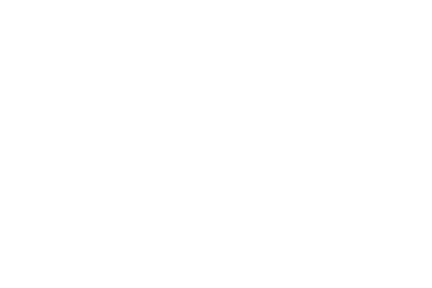

In [29]:
# Gradient descent parameters
iterations   = 1000
learningRate = 0.0001
initial_m    = 0
initial_n    = 0

# Plot data
m_list     = [initial_m]
n_list     = [initial_n]
error_list = [computeError(initial_m,initial_n)]

# Función de error (error cuadrático)
def computeError(m, n):
    totalError = 0
    for i in range(len(points)):
        x      = points[i, 0]
        target = points[i, 1]
        output = m*x + n
        totalError += (target - output)**2
    return totalError / float(len(points))


def stepGradient(m, n):
    m_gradient = 0
    n_gradient = 0
    N = float(len(points))

    for i in range(len(points)):
        x = points[i, 0]
        y = points[i, 1]

        # Partial derivative respect 'm'
        m_gradient += -(2/N) * x * (y - (m*x + n))

        #Partial derivative respect 'n'
        n_gradient += -(2/N) * (y - (m*x + n))

    new_m = m - (learningRate * m_gradient)
    new_n = n - (learningRate * n_gradient)

    return new_m, new_n

def init_plot(m, n):
    data = plt.subplot(121)
    data.axis('equal')
    data.scatter(x, y, color='cyan')
    data.set_title('Data')
    
def update_plot(m, n):
    # Plot 1 (data)
    regressionLine = [m*X + n for X in x]
    data.plot(x, regressionLine)

def linearRegr_gradDesc():
    m = initial_m
    n = initial_n

    init_plot(m, n)
    for i in range(iterations):
        m, n = stepGradient(m, n)
        
        update_plot(m, n)
        plt.show()
        
        m_list.append(m) # Save for plot
        n_list.append(n) # Save for plot
        error_list.append(computeError(m,n)) # Save for plot
    return m, n

# Compute linear regression
print("Performing gradient descent...")
m, n = linearRegr_gradDesc()
print("\nAfter ", iterations, " iterations:")
print("Slope (m)     = ", m)
print("Intercept (n) = ", n)
print("Square error  = ", computeError(m, n) )

"""
# Plot 1 (data)
regressionLine = [m*X + n for X in x]

data = plt.subplot(121)
data.axis('equal')
data.scatter(x,y, color='cyan')
data.plot(x, regressionLine)
data.set_title('Data')

# Plot 2 (gradient descent)
m = np.arange(0,3,0.1)
n = np.arange(-10,10,1)
M, N = np.meshgrid(m, n)
error = np.array([computeError(x,y) for x,y in zip(np.ravel(M), np.ravel(N))])
Z = error.reshape(M.shape)

grad = plt.subplot(122, projection='3d')
grad.plot_surface(M, N, Z, cmap='Blues_r') # Plane
grad.plot(m_list, n_list, error_list) # Line
grad.set_title('Gradient Descent')
grad.set_xlabel('slope (m)')
grad.set_ylabel('y-intercept (n)')
grad.set_zlabel('Error')


plt.show()
"""